In [1]:
%matplotlib inline
import sys
sys.path.append("..")

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [3]:
# load the file from the experiments directories

df = pd.DataFrame({})
for run in range(5):    
    fpath = os.path.join(
        "..",
        "experiments",
        "adaptive_no_finetune_constrained-cifar100-vgg19_bn-run{}".format(run),
        "out",
        "epoch.out"
    )
    tlog = TabLogger(fpath, resume=True)
    tlog.close()

    # add the run column to the data dictionary
    dd = tlog.numbers
    dd["Run"] = ["Run{}".format(run)] * len(list(dd.values())[0])

    # concat the dataframe
    df = pd.concat([df, pd.DataFrame(dd)])

In [4]:
print(df)

     Epoch  Train Task Loss  Train KD Loss  Train Mask Loss  Train Acc  \
0      0.0         0.532688       0.335460         0.964814     98.368   
1      1.0         0.791726       0.442312         0.970528     97.522   
2      2.0         0.859578       0.466220         0.978261     97.302   
3      3.0         0.818558       0.464227         0.976552     97.432   
4      4.0         0.865112       0.485654         0.982114     97.316   
..     ...              ...            ...              ...        ...   
129  129.0         0.692741       0.673203         0.000000     97.914   
130  130.0         0.715154       0.662787         0.000000     97.826   
131  131.0         0.656782       0.653910         0.000000     98.010   
132  132.0         0.655842       0.652841         0.000000     97.996   
133  133.0         0.665225       0.650546         0.000000     97.908   

     Eval Task Loss  Eval KD Loss  Eval Mask Loss  Eval Acc       LR  \
0         16.912864      0.726108      

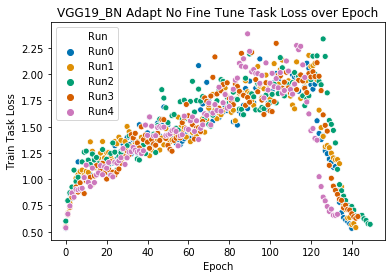

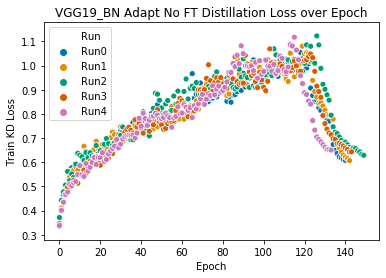

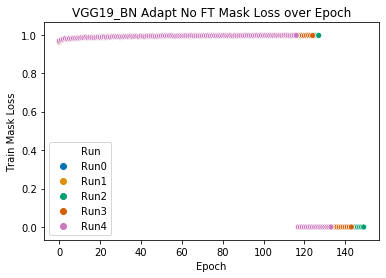

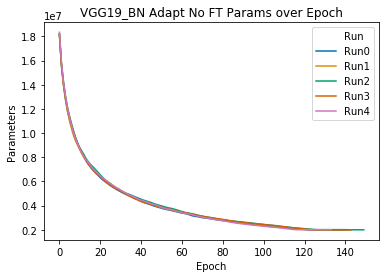

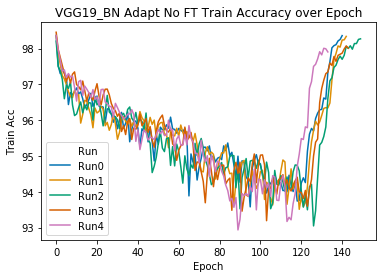

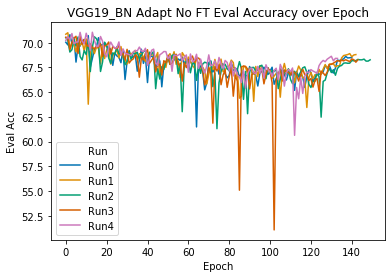

In [12]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


tl = sns.scatterplot(
    x="Epoch", y="Train Task Loss", hue="Run", data=df, palette="colorblind"
)
tl.set(title="VGG19_BN Adapt No Fine Tune Task Loss over Epoch")
plt.savefig("no_ft-train_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()

tl = sns.scatterplot(
    x="Epoch", y="Train KD Loss", hue="Run", data=df, palette="colorblind"
)
tl.set(title="VGG19_BN Adapt No FT Distillation Loss over Epoch")
plt.savefig("no_ft-train_kd_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


tl = sns.scatterplot(
    x="Epoch", y="Train Mask Loss", hue="Run", data=df, palette="colorblind"
)
tl.set(title="VGG19_BN Adapt No FT Mask Loss over Epoch")
plt.savefig("no_ft-mask_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()

ta = sns.lineplot(
    x="Epoch", y="Parameters", hue="Run", data=df, palette="colorblind"
)
ta.set(title="VGG19_BN Adapt No FT Params over Epoch")
plt.savefig("no_ft-params-cifar100-vgg19_bn.png", dpi=200)
plt.show()


ta = sns.lineplot(
    x="Epoch", y="Train Acc", hue="Run", data=df, palette="colorblind"
)
ta.set(title="VGG19_BN Adapt No FT Train Accuracy over Epoch")
plt.savefig("no_ft-train_acc-cifar100-vgg19_bn.png", dpi=200)
plt.show()

ea = sns.lineplot(
    x="Epoch", y="Eval Acc", hue="Run", data=df, palette="colorblind"
)
ea.set(title="VGG19_BN Adapt No FT Eval Accuracy over Epoch")
# g.set_yscale("log")
plt.savefig("no_ft-eval_acc-cifar100-vgg19_bn.png", dpi=200)
plt.show()